<a href="https://www.kaggle.com/code/udayr007/heartdisease?scriptVersionId=151456601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from warnings import simplefilter
simplefilter('ignore')

In [2]:
pwd

'/kaggle/working'

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease/heart_data.csv")
df.head()

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [4]:
# checking the missing values
df.isnull().sum()

Unnamed: 0       0
biking           0
smoking          0
heart.disease    0
dtype: int64

In [5]:
# droping the column unanmed
df = df.drop("Unnamed: 0", axis=1)
df.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


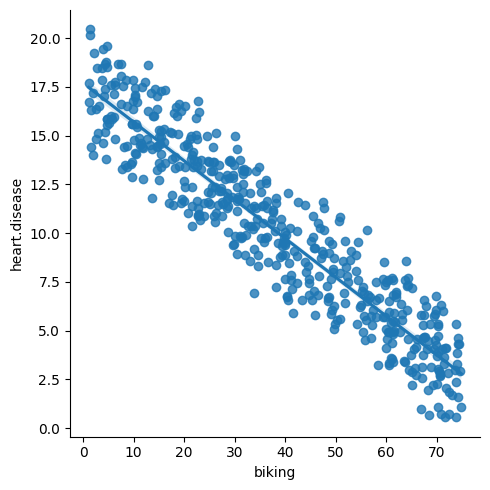

In [6]:
sns.lmplot(x = "biking", y = 'heart.disease', data=df)

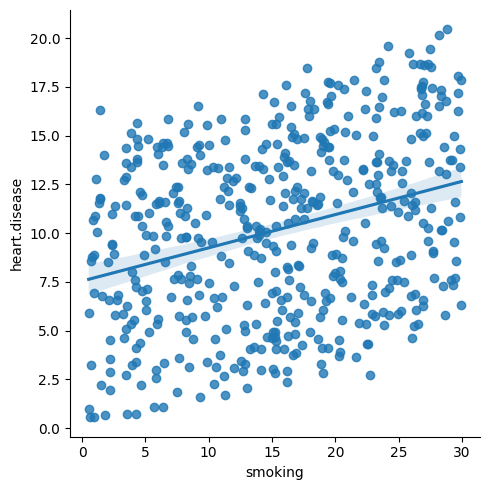

In [7]:
sns.lmplot(x = 'smoking', y='heart.disease', data = df)

In [8]:
x_df = df.drop('heart.disease', axis=1)
y_df = df['heart.disease']

In [9]:
x_df.shape

(498, 2)

In [10]:
y_df.shape

(498,)

In [11]:
x_df.head()

,biking,smoking
0,30.801246,10.896608
1,65.129215,2.219563
2,1.959665,17.588331
3,44.800196,2.802559
4,69.428454,15.974505


In [12]:
y_df.head()

0    11.769423
1     2.854081
2    17.177803
3     6.816647
4     4.062224
Name: heart.disease, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, train_size= 0.7, test_size=0.3, random_state=0)

In [14]:
# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# r2 score of the dataset
lin_pred_test = lin_model.predict(X_test)
r2_score(y_test, lin_pred_test)

0.9785466349977251

In [16]:
# mean square error of the dataset
mean_squared_error(y_test, lin_pred_test)

0.4580638711699123

In [17]:
print("Mean sq. errror between y_test and predicted =", np.mean(lin_pred_test-y_test)**2)

Mean sq. errror between y_test and predicted = 0.0011300300424113396


In [18]:
# writing the pickle for serializing and deserializing the object
pickle.dump(lin_model, open('model.pkl','wb'))

In [19]:
# loading the pickle file
lin_model = pickle.load(open('model.pkl','rb'))

In [20]:
# predict the model from pickle
print(lin_model.predict([[20.1,56.3]]))

[20.85074088]
